In [0]:
# Importing the required libraries
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
from tqdm._tqdm_notebook import tqdm

In [0]:
# This function is used to plot the generated datapoints. It takes the parameter X(feature-1) and y(feature-2) and number of Classses
# that is numClasses and plots the scatter plots of these points.

def plot_graph(X,y,numClasses = 2):
  for i in range(numClasses):
    X_cord = []
    y_cord = []
    for j in range(len(y)):
      if(y[j] == i):
        X_cord.append(X[j][0])
        y_cord.append(X[j][1])
    plt.scatter(X_cord,y_cord,s=50,marker="o",edgecolors="w")


In [0]:
# This function is used to generate datapoints. The number of classes is decided by the parameter "numClasses". Its default values is 2.
# The parameter "numExamples" denotes the number of datapoints to be generated.
# The parameter "dstributionShape tells us which of the two distribution to be generated."
# The parameter "numOutputs" specifies the number of output columns. Its default value is 2.

def generateData(numExamples, distributionShape, numClasses=2, numOutputs=1):
  total = numExamples
  numExamples = math.floor(numExamples/numClasses) 
  whole_data = [] 

  # If distributionShape is 'c' that means concentric circles of uniform distribution should be generated
  # These circles are generated at center (1,1) with different radius
  # To generate the circle, I am using the equation of circle (X = r*cos(theta), Y = r*sin(theta)) where r is the radius and theta is the angle

  if(distributionShape == "c"):
    xCenter,yCenter = 1,1
    gap = 0
    theta = np.random.rand((numExamples)) * (2 * np.pi)
    for i in range(numClasses):
      if(i == 0):
        r1 = np.random.uniform(low=i, high=i + 1.5, size=numExamples)
      else:
        r1 = np.random.uniform(low=i+1+gap, high=i+2+gap, size=numExamples)
        gap+=1
      x1, y1 = r1 * np.cos(theta) + xCenter, r1 * np.sin(theta) + yCenter
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(numExamples,1))*i,axis=1)
      whole_data.append(list(type1))
    X = np.array(whole_data).reshape(numExamples*numClasses,3)
    
    # Making the dataset equal to numExamples
    diff = total - len(X) 
    if(diff != 0):
      new_data = []
      r1 = np.random.uniform(low=0, high=1.5, size=diff)
      theta = np.random.rand((diff)) * (2 * np.pi)
      x1, y1 = r1 * np.cos(theta) + xCenter, r1 * np.sin(theta) + yCenter
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(diff,1))*0,axis=1)
      new_data.append(list(type1))
      new_data = np.array(new_data).reshape((diff,3))
      X = np.append(arr=X,values=new_data,axis=0)
    return X

# To generate the gaussian distribution, np.random.normal() is being used with increasing mean values to shift the clusters.
  elif(distributionShape == "g"):
    gap = 0
    for i in range(numClasses):
      x1 = np.random.normal(loc=gap, scale=2, size=numExamples)
      y1 = np.random.normal(loc=gap, scale=2, size=numExamples)
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(numExamples,1))*i,axis=1)
      whole_data.append(list(type1))
      gap+=10
    X = np.array(whole_data).reshape(numExamples*numClasses,3)
    diff = total - len(X) 

    # Making the dataset equal to numExamples
    if(diff != 0):
      new_data = []
      x1 = np.random.normal(loc=0, scale=2, size=diff)
      y1 = np.random.normal(loc=0, scale=2, size=diff)
      x1 = x1.reshape(len(x1),1)
      y1 = y1.reshape(len(y1),1)
      type1 = np.append(arr=x1, values=y1, axis=1)
      type1 = np.append(arr=type1,values = np.ones(shape=(diff,1))*0,axis=1)
      new_data.append(list(type1))
      new_data = np.array(new_data).reshape((diff,3))
      X = np.append(arr=X,values=new_data,axis=0)
    return X
    
  else:
    print("Invalid Shape")
    return 0
  
# This function adds noise with the given probability. It first shuffles the dataset and randomly adds noise as per the probability
def addNoise(data, noise, numClasses):
  
  noise = math.ceil(noise * len(data))
  np.random.shuffle(data)
  values = np.arange(start=0, stop=numClasses,step=1,dtype="int")
  for i in range(noise):
    var = random.choice(values)
    while(var == data[i][2]):
      var = random.choice(values)
    data[i][2] = var
  return data


# This function is used to split the dataset into training data and testing data. It first shuffles the dataset and then splits it.
# The default testsize is 10 that is there is 90% training data and 10% test data
def data_split(X,testsize = 10):
  np.random.shuffle(X)
  split  = math.floor((testsize*len(X))/100)
  return X[split:,:], X[0:split,:] 

In [0]:
class Model:
  # Initializing all the parameters with their default values 
  def __init__(self, numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType ="R"):
    self.numInputs = numInputs
    self.numOutputs = numOutputs
    self.layerSize = layerSize
    self.numHiddenLayers = numHiddenLayers
    self.activationType = activationType
  
  # Method for setting the training data
  def setInput(self,X_train):
    self.Xtrain = Xtrain

  # Method for setting the testing data
  def setTest(self, X_test):
    self.Xtest = Xtest 

  def cross_entropy(self, predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

  # Method that will return the dot product of the Matrix A and Weight W. This is used in forward pass and during prediction.
  def linear_forward(self, A, W):
    Z = np.dot(A, W)
    return Z
  
  # This method checks the type of activation function and then calculates the activation value. To calculate the dot product it class the
  # above function linear_forward().
  def linear_activation_forward(self, A_prev, W, activation):
      if (activation == "S"):
        Z = self.linear_forward(A_prev, W)
        A = 1/(1+np.exp(-Z))  
      elif (activation == "R"):
        Z = self.linear_forward(A_prev, W)
        A = np.maximum(0,Z)
      elif (activation == "X"):
        Z = self.linear_forward(A_prev, W)
        exp_max = np.exp(Z - np.max(Z,axis=-1,keepdims=True))
        A = exp_max/np.sum(exp_max,axis=-1,keepdims=True)
      elif (activation == "L"):
        Z = self.linear_forward(A_prev, W)
        A = Z
      
      # cache is the list which will contain the Z and A.
      # Z is the dot product of the matrix A and W.
      # A is the activation of Z depending on the type of the activation function
      cache = (Z, A)
      return A, cache
  
  # This methos sets all the weight matrices to the value passed to the function as "value".
  # Creating weight matrices of these kind are useful in debugging.
  def setWeights(self,value):
    self.parameters = {}
    L = self.numHiddenLayers
    for l in range(0, L + 1):
      if(l==0):
        self.parameters['W' + str(l)] = np.ones((self.numInputs+1, self.layerSize)) * value
      elif(l == L):
        self.parameters['W' + str(l)] = np.ones((self.layerSize, self.numOutputs)) * value
      else:
        self.parameters['W' + str(l)] = np.ones((self.layerSize, self.layerSize)) *value

  # This method initializes the weight matrix as per the given mean and standard deviation
  def initWeights(self,mean=0.0,deviation=0.01):
    self.parameters = {}
    L = self.numHiddenLayers
    for l in range(0, L + 1):
      if(l==0):
        self.parameters['W' + str(l)] = np.random.random((self.numInputs+1, self.layerSize)) 
      elif(l == L):
        self.parameters['W' + str(l)] = np.random.random((self.layerSize, self.numOutputs)) 
      else:
        self.parameters['W' + str(l)] = np.random.random((self.layerSize, self.layerSize)) 

  # This method is used for training the N-layer neural network
  def train(self,numIter,learning_rate):

    trainLoss =[]
    testLoss = []
    # Below two lines of code is used to separate out the features and the target values from the dataset. Y contains all the true targets
    Y = self.Xtrain[:,-1]
    Y = Y.reshape((len(Y),1))


    if(self.numOutputs > 1):
      Y = np.array(pd.get_dummies(Y.ravel(),dtype="int"))  # Creating dummy variables for target labels when numOutputs > 1
       
    for i in tqdm(range(numIter)):
      A = self.Xtrain[:,:-1]
      self.caches = [] # List to store all the Z and A values as mentioned in the linear_forward() function
      self.caches.append(A)
      for l in range(0, self.numHiddenLayers): # Performing forward pass for all the layers except last since it can be sigmoid or softmax
        A_prev = A
        A ,cache = self.linear_activation_forward(A_prev, self.parameters['W' + str(l)], activation=self.activationType)  
        self.caches.append(cache)

      # Performing forward pass on last layer depending on numOutputs
      # If numOutputs > 1 then last layer is softmax denoted by alphabet "X", else it is sigmoid denoted by "S"
      if(self.numOutputs > 1):
        AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(self.numHiddenLayers)], activation='X')
      else:
        AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(self.numHiddenLayers)], activation='S')
      self.caches.append(cache)

    

      # Uptil here was forward pass, now backpropagation  begins from here
      grads = {}        # This is the dictionary to store all the derivatives of weights
      dy = AL - Y
      current_cache = self.caches[-1]       # getting the activation of the current layer
      prev_cache = self.caches[-2]          # getting the activation of previous layer

      if(self.numOutputs > 1):              # checking for softmax/sigmoid for the last layer
        dA = AL - Y                         # This is the softmax derivative
      else:
        dA = dy * current_cache[1] * (1 - current_cache[1])          # This is the sigmoid derivative

      grads["dW" + str(self.numHiddenLayers)] = np.dot(prev_cache[1].T,dA)
      dprev = dA
      for k in range(self.numHiddenLayers,0,-1):    # Finding derivative for the rest of the other layers
        current_cache = self.caches[k]
        prev_cache = self.caches[k-1]
        if(self.activationType == "S"):             # Getting the derivative based on the activation function
          deriv =  (current_cache[1] * (1 - current_cache[1]))
        elif(self.activationType == "R"):
          deriv = ((current_cache[1]>0)+0)
        elif(self.activationType == "L"):
          deriv = 1
        dA = np.dot(dprev,self.parameters["W"+str(k)].T) * deriv

        # Finding gradient for first layer will be slightly different
        if(k == 1):
          grads["dW" + str(k-1)] = np.dot(prev_cache.T,dA)
        else:
          grads["dW" + str(k-1)] = np.dot(prev_cache[1].T,dA)
        dprev=dA
      
      if(self.numOutputs > 1):
        trainLoss.append(self.cross_entropy(AL,Y))
        # testPredictions = self.predict(self.Xtest[:,:-1])
        testTarget = self.test()
        testLoss.append(testTarget) 
      else:
        trainLoss.append(np.square(AL - Y).mean())
        # prediction_test = self.predict(self.Xtest[:,:-1])
        testTarget = self.test()
        testLoss.append(testTarget)

      for l in range(len(self.parameters)):       # Performing the gradient step
          self.parameters["W" + str(l)] = self.parameters['W' + str(l)] - (learning_rate * grads['dW' + str(l)])

    whole_error = np.array([trainLoss,testLoss]).T
    return whole_error


  # This method returns the predictions for the given test data
  def predict(self,Xtest):
    A = Xtest
    for l in range(0, self.numHiddenLayers):
      A_prev = A 
      A ,cache = self.linear_activation_forward(A_prev, self.parameters['W' + str(l)], activation=self.activationType)  
    if(self.numOutputs > 1):
      AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(self.numHiddenLayers)], activation='X')
    else:
      AL, cache = self.linear_activation_forward(A, self.parameters['W' + str(self.numHiddenLayers)], activation='S')
    return AL
  
  # This method return the test error on the test data
  def test(self):
    testPredictions = self.predict(self.Xtest[:,:-1])
    if(self.numOutputs > 1):
      testTarget = np.array(pd.get_dummies(self.Xtest[:,-1]),dtype="int")
      answer = self.cross_entropy(testPredictions, testTarget)
    else:
      answer = np.square(testPredictions.ravel() - self.Xtest[:,-1]).mean()
    return answer
  

  # This method is used to calculate the accuracy on the data
  def accuracy(self,predictions):
    if(self.numOutputs > 1):
      new_ypred = []
      for row in predictions:
        ans = np.where(row == row.max())[0][0]
        new_ypred.append(ans)
      ypred = np.array(new_ypred)
      answer = list(ypred == self.Xtest[:,-1])
      correct = answer.count(True)
      acc = (correct*100)/len(answer)
      return acc
    else:
      ytest = self.Xtest[:,-1].reshape((len(self.Xtest),1))
    answer = list((np.around(predictions,decimals=0) == ytest).ravel())
    correct = answer.count(True)
    acc = (correct*100)/len(answer)
    return acc

  # This function is used to plot the decision boundary of the dataset
  def plotDecisionBoundary(self):
      a = np.arange(start = min(self.Xtrain[:,1])-1,stop=max(self.Xtrain[:,1])+1,step = 0.01)
      b = np.arange(start = min(self.Xtrain[:,2])-1,stop=max(self.Xtrain[:,2])+1,step = 0.01)
      XX, YY = np.meshgrid(a,b)
      grid  = np.array([XX.ravel(),YY.ravel()]).T
      grid = np.append(arr=np.ones(shape=(len(grid),1)),values=grid, axis = 1)
      ypred = self.predict(grid) 
      if(self.numOutputs > 1):
        new_ypred = []
        for row in ypred:
          ans = np.where(row == row.max())[0][0]
          new_ypred.append(ans)
        ypred = np.array(new_ypred)
      # plt.figure(figsize=(7,6))
      plt.contourf(XX,YY,np.around(ypred,decimals=0).reshape(XX.shape),alpha=0.75)
      plt.scatter(X[:,1],X[:,2],marker="o",c=X[:,-1],edgecolors="w")
      plt.title("Decision boundary of a Neural Network")
      plt.xlabel("Feature-1")
      plt.ylabel("Feature-2")
      # plt.show()

[1]  I am generating 3 Gaussian and 3 Concentric circle each with 2, 3 and 4 different classes

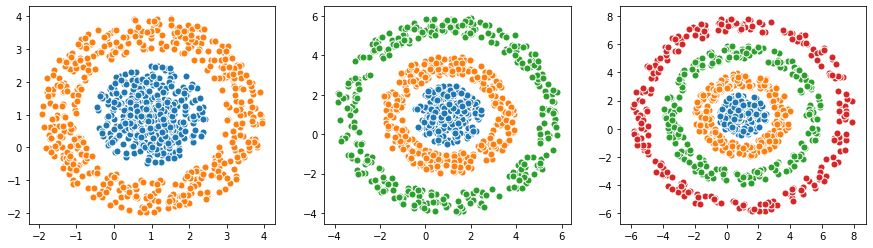

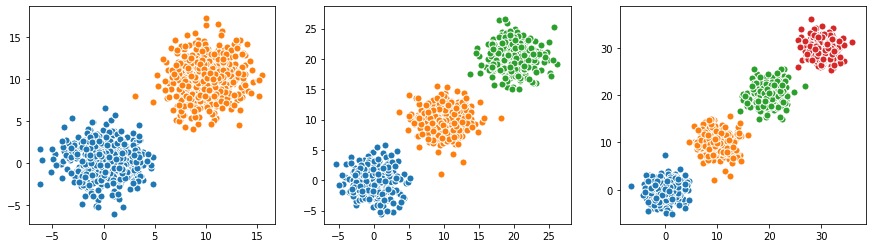

In [0]:
plt.figure(figsize=(15,4))
plt.subplot(131)
Xdata1 = generateData(1000,"c",numClasses = 2, numOutputs = 2)
plot_graph(Xdata1[:,:-1],Xdata1[:,-1],numClasses=2)

plt.subplot(132)
Xdata2 = generateData(1000,"c",numClasses = 3, numOutputs = 3)
plot_graph(Xdata2[:,:-1],Xdata2[:,-1],numClasses=3)

plt.subplot(133)
Xdata3 = generateData(1000,"c",numClasses = 4, numOutputs = 4)
plot_graph(Xdata3[:,:-1],Xdata3[:,-1],numClasses=4)

plt.figure(figsize=(15,4))
plt.subplot(131)
Xdata4 = generateData(1000,"g",numClasses = 2, numOutputs = 2)
plot_graph(Xdata4[:,:-1],Xdata4[:,-1],numClasses=2)

plt.subplot(132)
Xdata5 = generateData(1000,"g",numClasses = 3, numOutputs = 3)
plot_graph(Xdata5[:,:-1],Xdata5[:,-1],numClasses=3)

plt.subplot(133)
Xdata6 = generateData(1000,"g",numClasses = 4, numOutputs = 4)
plot_graph(Xdata6[:,:-1],Xdata6[:,-1],numClasses=4)

[2]  Adding noise

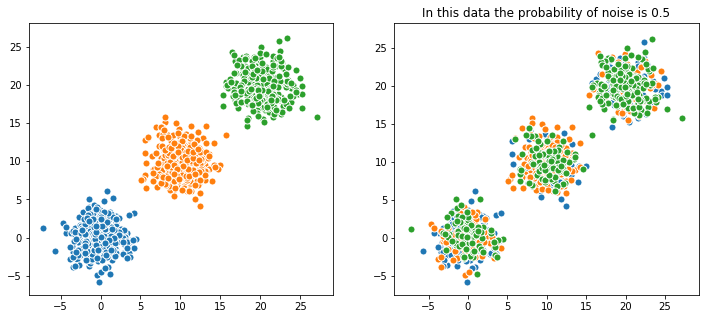

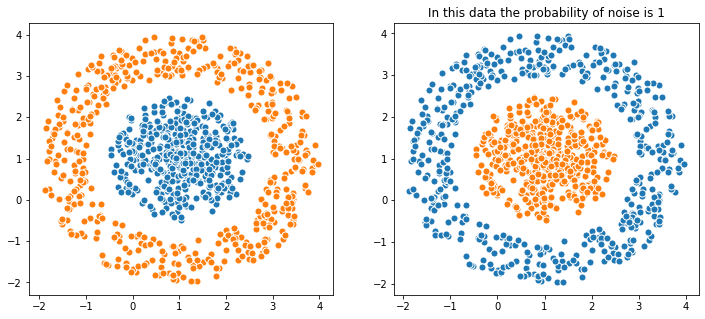

In [0]:
plt.figure(figsize=(12,5))
plt.subplot(121)
Xdata1 = generateData(1000,"g",numClasses = 3, numOutputs = 3)
plot_graph(Xdata1[:,:-1],Xdata1[:,-1],numClasses=3)
plt.subplot(122)
plt.title("In this data the probability of noise is 0.5")
Xdata1 = addNoise(Xdata1,0.5,numClasses=3)
plot_graph(Xdata1[:,:-1],Xdata1[:,-1],numClasses=3)

plt.figure(figsize=(12,5))
plt.subplot(121)
Xdata2 = generateData(1000,"c",numClasses = 2, numOutputs = 2)
plot_graph(Xdata2[:,:-1],Xdata2[:,-1],numClasses=2)
plt.subplot(122)
plt.title("In this data the probability of noise is 1")
Xdata2 = addNoise(Xdata2,1,numClasses=2)
plot_graph(Xdata2[:,:-1],Xdata2[:,-1],numClasses=2)

[3]  I am running a small feed forward neural network with 1 HiddenLayer, 4 neurons in the hidden layer, number of outputs is 1 and activation function as sigmoid.




100%|██████████| 60000/60000 [00:16<00:00, 3587.05it/s]



The accuracy is 100.0


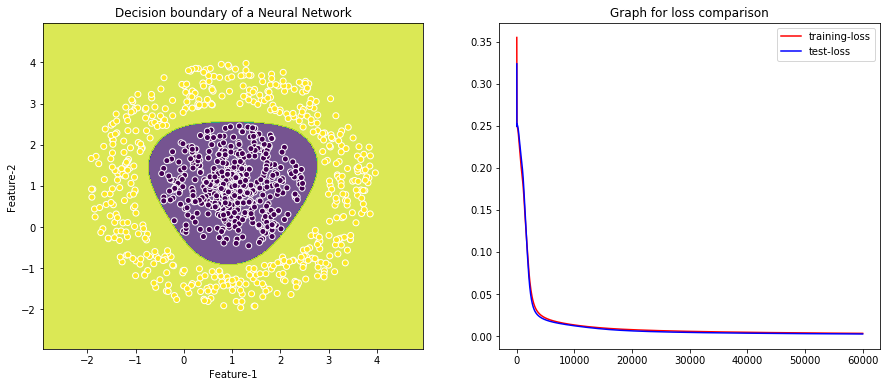

In [0]:
X = generateData(numExamples=1000,distributionShape="c", numClasses=2,numOutputs=1)
X = addNoise(X,0.0,numClasses=2)
X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
Xtrain, Xtest = data_split(X,testsize=10)
m = Model(numInputs=2, numOutputs=1, layerSize=4, numHiddenLayers=1, activationType="S")
m.initWeights()
m.setInput(Xtrain)
m.setTest(Xtest)
Error = m.train(60000,0.001)      # Using step size of 0.001 for Sigmoid
pred = m.predict(Xtest[:,:-1])
score = m.accuracy(pred)
print("\nThe accuracy is",score)
plt.figure(figsize=(15,6))
plt.subplot(121)
m.plotDecisionBoundary()
plt.subplot(122)
plt.title("Graph for loss comparison")
plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
plt.legend(["training-loss","test-loss"])

[4] Runing the neural network on the default setting as per the class constructor

100%|██████████| 60000/60000 [00:15<00:00, 3762.99it/s]



The accuracy is 100.0


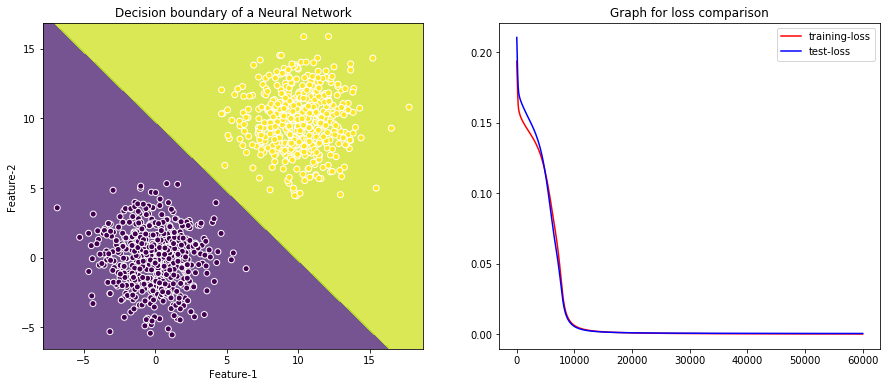

In [0]:
X = generateData(numExamples=1000,distributionShape="g", numClasses=2,numOutputs=1)
X = addNoise(X,0.0,numClasses=2)
X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
Xtrain, Xtest = data_split(X,testsize=10)
m = Model()             #This is the default setting
m.initWeights()
m.setInput(Xtrain)
m.setTest(Xtest)
Error = m.train(60000,0.00001)        # Using step size of 0.00001 for RELU
pred = m.predict(Xtest[:,:-1])
score = m.accuracy(pred)
print("\nThe accuracy is",score)
plt.figure(figsize=(15,6))
plt.subplot(121)
m.plotDecisionBoundary()
plt.subplot(122)
plt.title("Graph for loss comparison")
plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
plt.legend(["training-loss","test-loss"])

[5] Running the neural network with **0.02 probability of noisy data**, 2 hidden layers, 1 output unit, activation function as "Relu" and running for [2,5] hidden units


100%|██████████| 60000/60000 [00:12<00:00, 4752.52it/s]



The accuracy is 65.83333333333333 when number of hidden units is 1


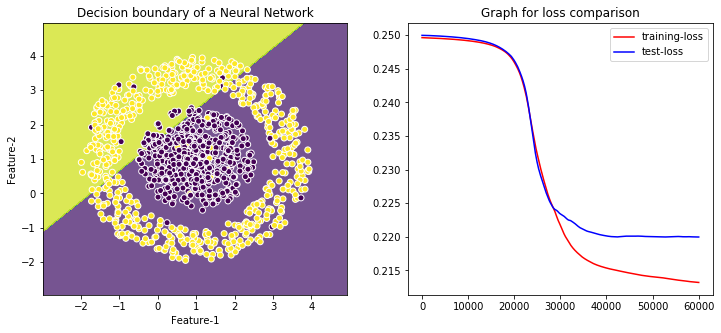

100%|██████████| 60000/60000 [00:17<00:00, 3417.20it/s]



The accuracy is 67.5 when number of hidden units is 2


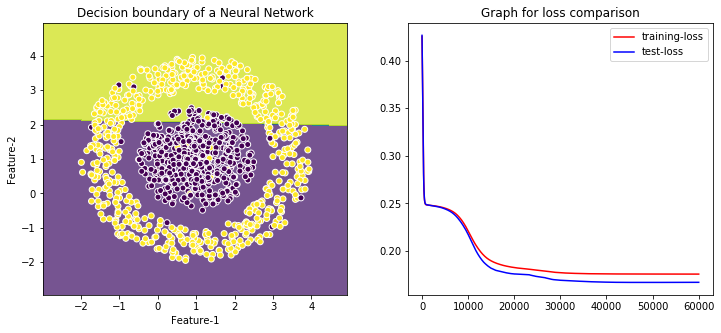

100%|██████████| 60000/60000 [00:20<00:00, 2989.66it/s]



The accuracy is 95.83333333333333 when number of hidden units is 3


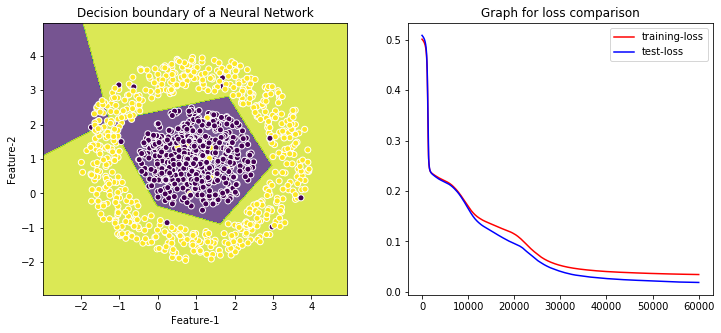

100%|██████████| 60000/60000 [00:21<00:00, 2797.96it/s]



The accuracy is 99.16666666666667 when number of hidden units is 4


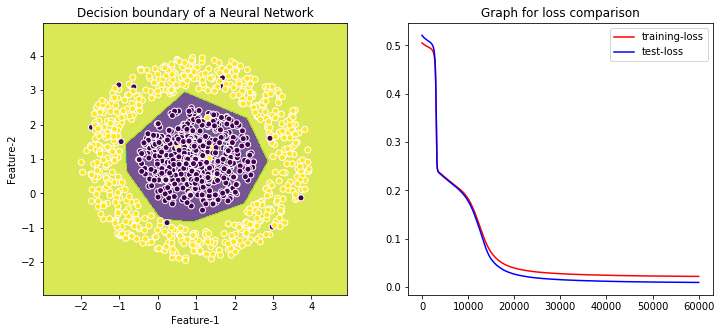

In [0]:
X = generateData(numExamples=1200,distributionShape="c", numClasses=2,numOutputs=1)
X = addNoise(X,0.02,numClasses=2)
X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
Xtrain, Xtest = data_split(X,testsize=10)
for i in range(1,5):
  m = Model(numInputs=2, numOutputs=1, layerSize=i, numHiddenLayers=2, activationType="R")
  m.initWeights()
  m.setInput(Xtrain)
  m.setTest(Xtest)
  Error = m.train(60000,0.00001)          # Using step size of 0.00001 for RELU
  pred = m.predict(Xtest[:,:-1])
  score = m.accuracy(pred)
  print("\nThe accuracy is",score,"when number of hidden units is",i)
  plt.figure(figsize=(12,5))
  plt.subplot(121)
  m.plotDecisionBoundary()
  plt.subplot(122)
  plt.title("Graph for loss comparison")
  plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
  plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
  plt.legend(["training-loss","test-loss"])
  plt.show()

[6] Running a neural network with 2 hiddenlayers, 2 neurons per layers, 1 output unit and activation function as "Linear".

It can be aslo configured with activation function as "RELU" or "Sigmoid"

100%|██████████| 60000/60000 [00:09<00:00, 6171.82it/s]



The accuracy is 100.0


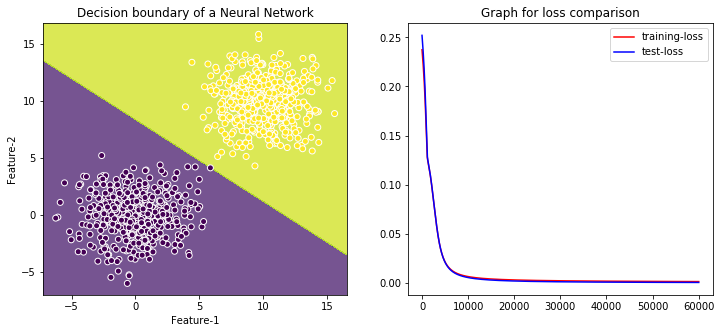

In [0]:
X = generateData(numExamples=1000,distributionShape="g", numClasses=2,numOutputs=1)
X = addNoise(X,0.0,numClasses=2)
X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
Xtrain, Xtest = data_split(X,testsize=10)
m = Model(numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=1, activationType="L")
m.initWeights()
m.setInput(Xtrain)
m.setTest(Xtest)
Error = m.train(60000,0.00001)        # Using step size of 0.01 for Linear Activation Function
pred = m.predict(Xtest[:,:-1])
score = m.accuracy(pred)
print("\nThe accuracy is",score)
plt.figure(figsize=(12,5))
plt.subplot(121)
m.plotDecisionBoundary()
plt.subplot(122)
plt.title("Graph for loss comparison")
plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
plt.legend(["training-loss","test-loss"])

[7] Running the neural network with different datasets having [3-5) number of distinct classes

100%|██████████| 60000/60000 [01:49<00:00, 550.29it/s]



The accuracy is 99.0 when number of distinct classes is 3


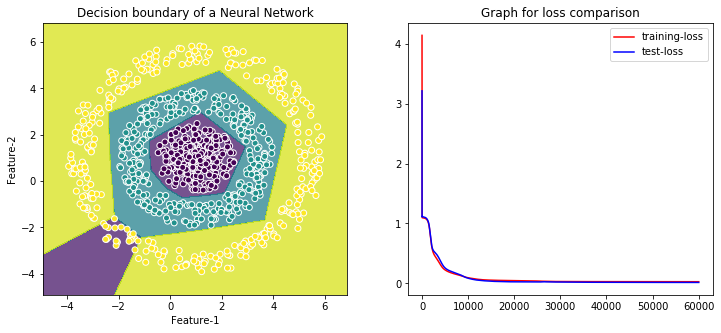

100%|██████████| 60000/60000 [01:54<00:00, 525.17it/s]



The accuracy is 100.0 when number of distinct classes is 4


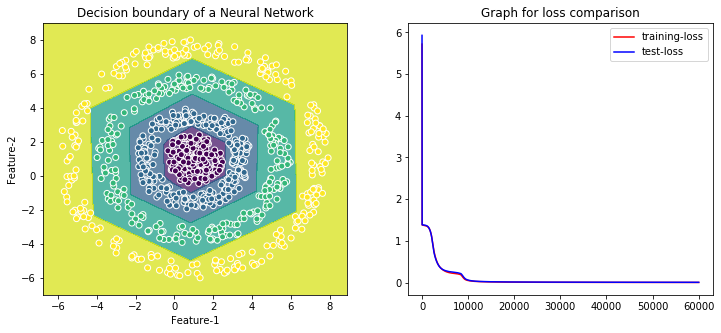

In [0]:
for i in range(3,5):
  X = generateData(numExamples=1000,distributionShape="c", numClasses=i,numOutputs=1)
  X = addNoise(X,0.0,numClasses=i)
  X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
  Xtrain, Xtest = data_split(X,testsize=10)
  m = Model(numInputs=2, numOutputs=i, layerSize=5, numHiddenLayers=2, activationType="R")
  m.initWeights()
  m.setInput(Xtrain)
  m.setTest(Xtest)
  Error = m.train(60000,0.00001)       # Using step size of 0.00001 for RELU
  pred = m.predict(Xtest[:,:-1])
  score = m.accuracy(pred)
  print("\nThe accuracy is",score,"when number of distinct classes is",i)
  plt.figure(figsize=(12,5))
  plt.subplot(121)
  m.plotDecisionBoundary()
  plt.subplot(122)
  plt.title("Graph for loss comparison")
  plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
  plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
  plt.legend(["training-loss","test-loss"])
  plt.show()

[8] Running the neural network with 3 hidden layers

100%|██████████| 60000/60000 [02:38<00:00, 378.93it/s]



The accuracy is 100.0 when number of hidden layers is 3


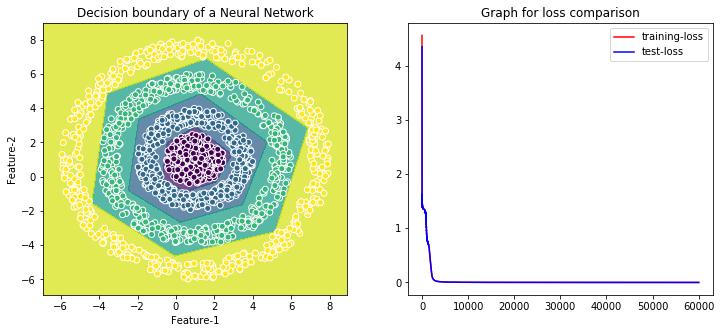

In [0]:
X = generateData(numExamples=2000,distributionShape="c", numClasses=4,numOutputs=1)
X = addNoise(X,0.0,numClasses=4)
X = np.append(arr=np.ones(shape=(len(X),1)),values=X,axis=1)
Xtrain, Xtest = data_split(X,testsize=10)
m = Model(numInputs=2, numOutputs=4, layerSize=5, numHiddenLayers=3, activationType="R")
m.initWeights()
m.setInput(Xtrain)
m.setTest(Xtest)
Error = m.train(60000,0.00001)  # Using step size of 0.00001 for RELU
pred = m.predict(Xtest[:,:-1])
score = m.accuracy(pred)
print("\nThe accuracy is",score,"when number of hidden layers is 3")
plt.figure(figsize=(12,5))
plt.subplot(121)
m.plotDecisionBoundary()
plt.subplot(122)
plt.title("Graph for loss comparison")
plt.plot(np.arange(0,60000,1),Error[:,0],"r-")
plt.plot(np.arange(0,60000,1),Error[:,1],"b-")
plt.legend(["training-loss","test-loss"])

[9]  **Besides this, the nueral network can be configured by adding any number of hidden layers. It is completely dynamic that means we can add any number of hidden layers and any number of neurons in a hidden layer.**

**References**

[Getting random number in a range](https://stackoverflow.com/questions/6088077/how-to-get-a-random-number-between-a-float-range)

[Finding maximum inside matrix](https://www.geeksforgeeks.org/numpy-maximum-in-python/)

[Vectorised implementation for relu derivative](https://stackoverflow.com/questions/54969120/faster-implementation-for-relu-derivative-in-python)

[Softmax derivative](https://stackoverflow.com/questions/43438174/how-to-vectorize-softmax-probability-of-a-multi-dimensional-matrix)

[N-layer Neural Network](https://github.com/marcopeix/Deep_Learning_AI/blob/master/1.Neural%20Networks%20and%20Deep%20Learning/4.Deep%20Neural%20Networks/Building%20a%20Deep%20Neural%20Network.ipynb)

[Cross Entropy error](https://stackoverflow.com/questions/47377222/what-is-the-problem-with-my-implementation-of-the-cross-entropy-function)

